# Temperature on Electricity Demand (New England)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

%matplotlib inline

#For warning surpression
warnings.filterwarnings("ignore", category=FutureWarning)
#To reactivate warning
# warnings.filterwarnings("default", category=FutureWarning)

## Background
Rough skeleton

1. Talk about electcity market 
2. Talk about heating and how its fractured
3. Talk about Schaffer paper and exisitng literature 
4. Motivations into what why we are looking into this and what the plan is 

Testing branch

## Electricity Demand (System Load)

https://www.iso-ne.com/isoexpress/

In [2]:
states = ['ISONE CA', 'ME', 'NH', 'VT', 'CT', 'RI', 'SEMASS' ,'WCMASS', 'NEMASSBOST']

state_dfs = [pd.DataFrame(columns=['Date', 'Hour', 'Demand', 'Temperature']) for _ in states]

#### DO NOT TOUCH (Cleaning for final project)

In [3]:
# for year in range(2011, 2018):
#     path = f"data/demand/{year}_smd_hourly.xls"
#     if year >= 2016:
#         for i, state in enumerate(states):
#             state_df = pd.read_excel(path, sheet_name = state)
#             state_df = state_df[['Date', 'Hr_End', 'RT_Demand', 'Dry_Bulb']]
#             state_df = state_df.rename(columns = {'Hr_End' : 'Hour', 'RT_Demand' : 'Demand', 'Dry_Bulb' : 'Temperature'})
#             state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd-bb-yy')
            
#             state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)
#     else:
#         for i, state in enumerate(states):
#             state_df = pd.read_excel(path, sheet_name = state)
#             state_df = state_df[['Date', 'Hour', 'DEMAND', 'DryBulb']]
#             state_df = state_df.rename(columns = {'DEMAND' : 'Demand', 'DryBulb' : 'Temperature'})
#             state_df['Date'] = pd.to_datetime(state_df['Date'], format = 'dd/mm/yy')
            
#             state_dfs[i] = pd.concat([state_dfs[i], state_df], ignore_index = True)
            
# for i in range(len(state_dfs)):
#     #Set index as datetime
#     state_dfs[i]['Datetime'] = pd.to_datetime(state_dfs[i]['Date']) + pd.to_timedelta(state_dfs[i]['Hour'], unit='h')
#     state_dfs[i] = state_dfs[i].set_index('Datetime')
    
#     #Add Year column
#     state_dfs[i]['Year'] = pd.to_datetime(state_dfs[i]['Date']).dt.year
#     columns = ['Year'] + [col for col in state_dfs[i].columns if col != 'Year']
#     state_dfs[i] = state_dfs[i][columns]
    
#     #Remove all rows with 0 demand
#     state_dfs[i] = state_dfs[i][state_dfs[i]['Demand'] != 0]

#### Continue

In [4]:
state_names = ['isone_ca', 'me', 'nh', 'vt', 'ct', 'ri', 'sema', 'wcma', 'nema']

state_names_full = ['ISO-NE Control Area', 'Maine', 'New Hampshire', 'Vermont',
                    'Connecticut', 'Rhode Island', 'SouthEastern Massachusetts',
                    'Western & Central Massachusetts', 'NorthEastern Massachusetts & Boston']

In [5]:
for i in range(len(state_names)):
    path = f"data/Others/demand/{state_names[i]}.csv"
    state_dfs[i] = pd.read_csv(path)
    state_dfs[i]['Datetime'] = pd.to_datetime(state_dfs[i]['Date']) + pd.to_timedelta(state_dfs[i]['Hour'], unit='h')
    state_dfs[i] = state_dfs[i].set_index('Datetime')
    state_dfs[i]["Date"] = pd.to_datetime(state_dfs[i]["Date"])
    
    state_dfs[i]["Region"] = state_names_full[i]
    state_dfs[i] = state_dfs[i][['Year', 'Region'] + [col for col in state_dfs[i].columns if col not in ['Year', 'Region']]]

In [6]:
state_dfs[1]

,Year,Region,Date,Hour,Demand,Temperature
Datetime,,,,,,
2011-01-01 01:00:00,2011,Maine,2011-01-01,1,1048.000,31
2011-01-01 02:00:00,2011,Maine,2011-01-01,2,1000.000,31
2011-01-01 03:00:00,2011,Maine,2011-01-01,3,964.000,32
2011-01-01 04:00:00,2011,Maine,2011-01-01,4,954.000,35
2011-01-01 05:00:00,2011,Maine,2011-01-01,5,960.000,34
...,...,...,...,...,...,...
2017-12-31 20:00:00,2017,Maine,2017-12-31,20,1696.392,2
2017-12-31 21:00:00,2017,Maine,2017-12-31,21,1652.438,1
2017-12-31 22:00:00,2017,Maine,2017-12-31,22,1577.769,0


Text(0.5, 1.0, 'Electricity Demand on Temperature (Entire ISO-NE)')

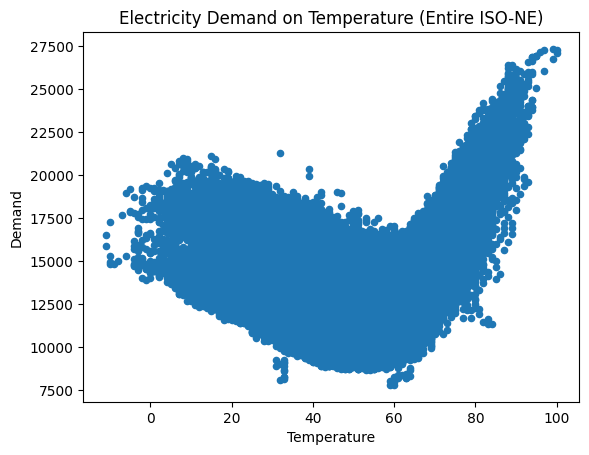

In [7]:
state_dfs[0].plot.scatter('Temperature', 'Demand')
plt.title('Electricity Demand on Temperature (Entire ISO-NE)')

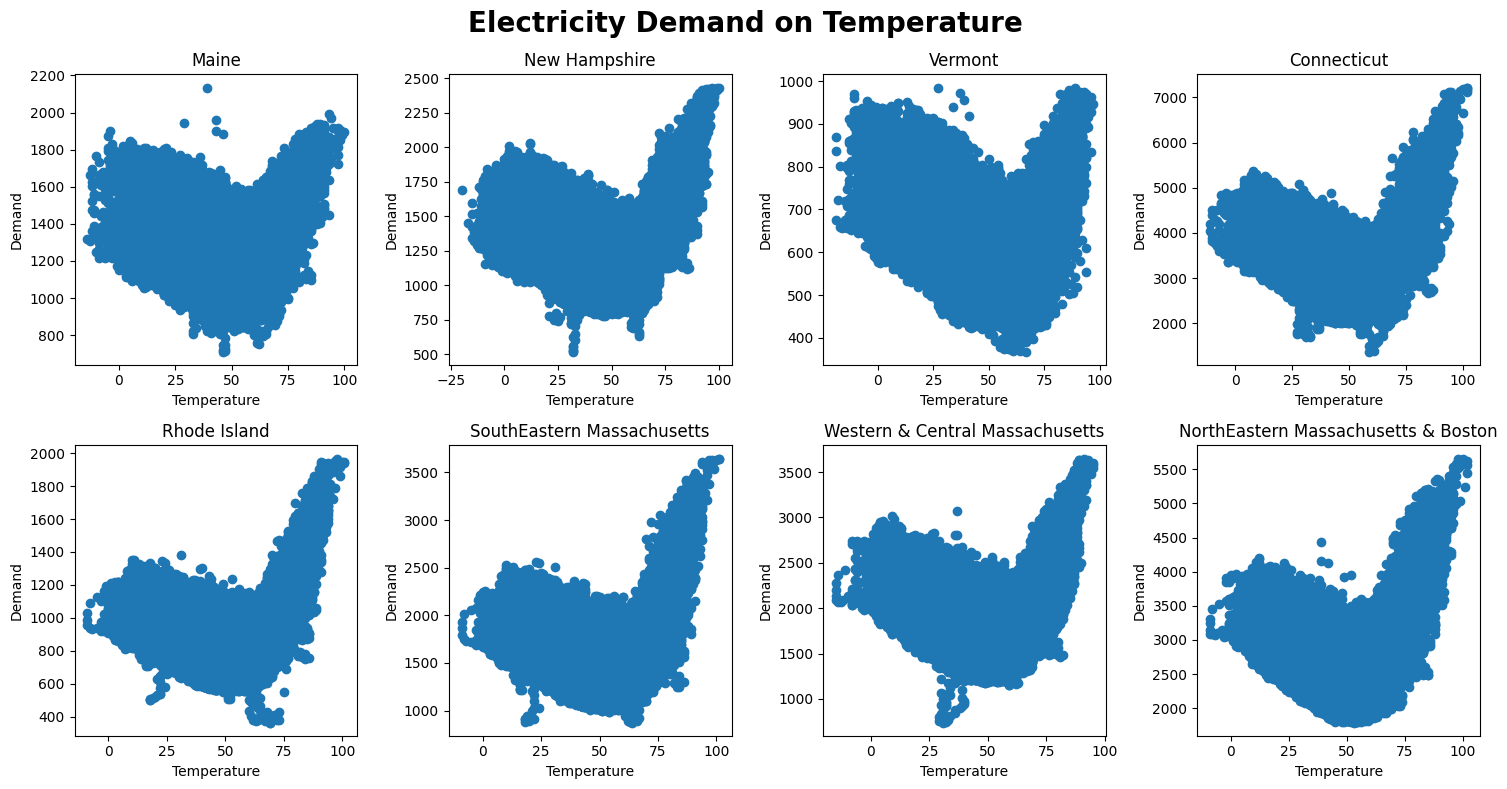

In [8]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Temperature'], df['Demand'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Demand')
    axes[i].set_xlabel('Temperature')

fig.suptitle('Electricity Demand on Temperature', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

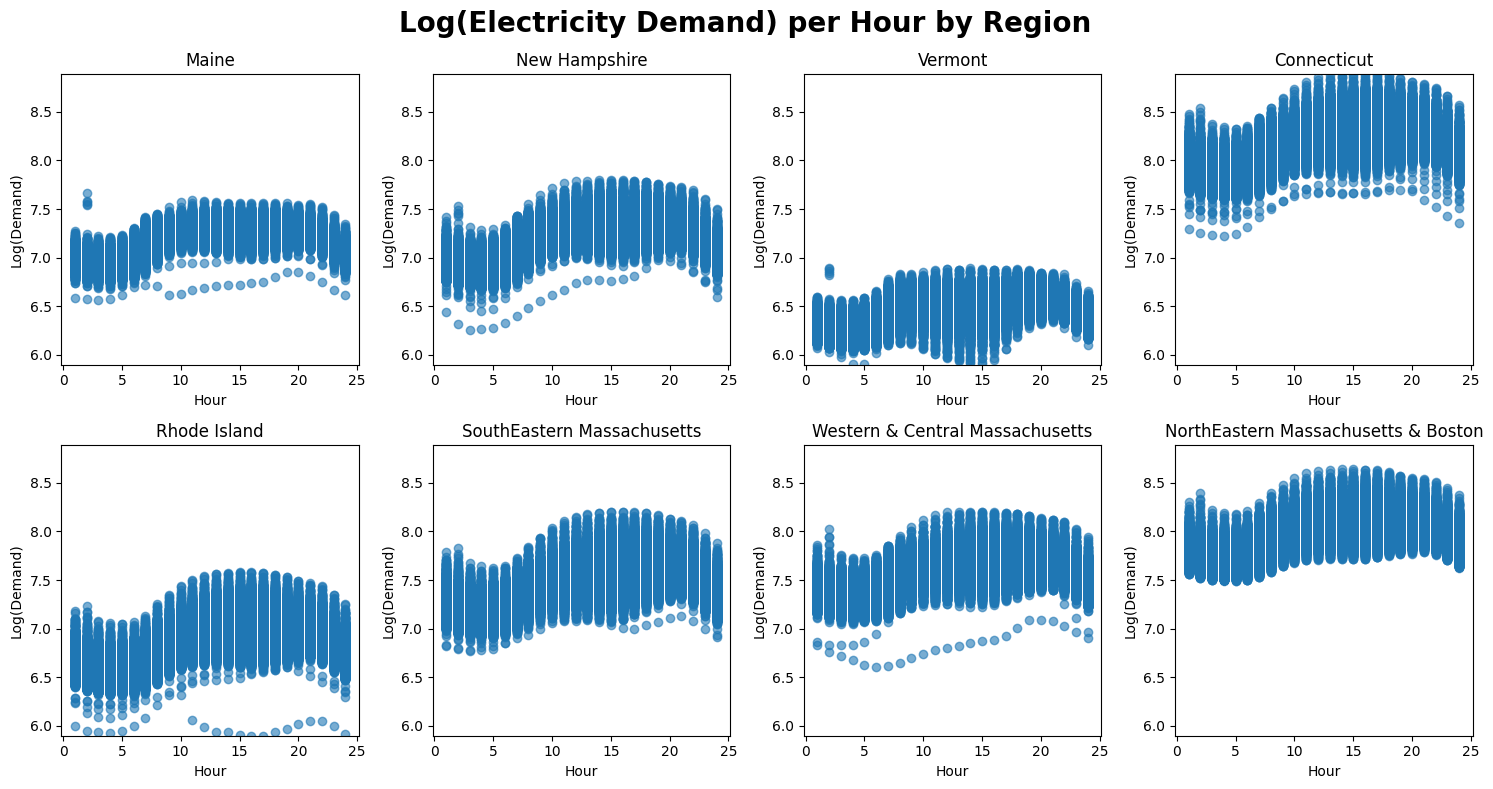

In [9]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names_full` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Find the global y-axis limits for log demand
y_min = min(np.log(df['Demand']).min() for df in state_dfs[1:])
y_max = max(np.log(df['Demand']).max() for df in state_dfs[1:])

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(state_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Hour'], np.log(df['Demand']), alpha=0.6)
    axes[i].set_title(name)
    axes[i].set_ylabel('Log(Demand)')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylim(y_min, y_max)  # Set the same y-axis scale for all plots

fig.suptitle('Log(Electricity Demand) per Hour by Region', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



### Natural Gas Prices

https://www.eia.gov/dnav/ng/ng_pri_sum_a_EPG0_PG1_DMcf_m.htm

We control for natural gas prices because 

In [10]:
ng = pd.read_excel('data/NG_PRI_SUM_A_EPG0_PG1_DMCF_M.xls', sheet_name = 'Data 1',
                   skiprows = 2)

ng = ng[['Date', 'Natural Gas Citygate Price in Connecticut (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in Maine (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in Massachusetts (Dollars per Thousand Cubic Feet)', 
         'Natural Gas Citygate Price in New Hampshire (Dollars per Thousand Cubic Feet)',
         'Natural Gas Citygate Price in Rhode Island (Dollars per Thousand Cubic Feet)',
         'Natural Gas Citygate Price in Vermont (Dollars per Thousand Cubic Feet)']]

ng.columns = ['Date', 'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']

ng = ng[(ng['Date'] >= '2011-01-01') & (ng['Date'] <= '2017-12-31')]

ng['year_month'] = ng['Date'].dt.to_period('M')

ng

,Date,Connecticut,Maine,Massachusetts,New Hampshire,Rhode Island,Vermont,year_month
456,2011-01-15,5.74,7.59,6.70,8.06,7.82,7.60,2011-01
457,2011-02-15,5.93,7.24,6.90,7.22,7.62,7.72,2011-02
458,2011-03-15,5.66,8.65,6.57,8.30,7.03,8.04,2011-03
459,2011-04-15,5.87,7.53,7.25,7.72,7.09,8.69,2011-04
460,2011-05-15,6.67,9.97,7.84,7.95,9.80,8.87,2011-05
...,...,...,...,...,...,...,...,...
535,2017-08-15,5.79,6.09,9.24,7.41,2.34,4.44,2017-08
536,2017-09-15,5.66,5.66,8.86,8.23,2.29,4.48,2017-09
537,2017-10-15,4.22,6.17,6.28,5.29,2.21,4.56,2017-10
538,2017-11-15,3.71,4.99,4.60,4.82,2.20,4.70,2017-11


In [11]:
for i in range(len(state_dfs)):
    state_dfs[i]['year_month'] = state_dfs[i]['Date'].dt.to_period('M')
    #All New England - no NG price data
    if i == 0:
        state_dfs[i].drop(columns = ['year_month'], inplace = True)
        continue
    #Maine
    elif i == 1:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Maine']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Maine': 'Natural Gas Price'})
    #New Hampsphire
    elif i == 2:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'New Hampshire']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'New Hampshire': 'Natural Gas Price'})
    #Vermont
    elif i == 3:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Vermont']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Vermont': 'Natural Gas Price'})
    #Connecticut
    elif i == 4:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Connecticut']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Connecticut': 'Natural Gas Price'})
    #Rhode Island
    elif i == 5:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Rhode Island']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Rhode Island': 'Natural Gas Price'})
    #Massachusetts
    else:
        state_dfs[i] = pd.merge(state_dfs[i], ng[['year_month', 'Massachusetts']], on = 'year_month', how = 'left')
        state_dfs[i] = state_dfs[i].rename(columns={'Massachusetts': 'Natural Gas Price'})
    state_dfs[i].drop(columns = ['year_month'], inplace = True)

In [12]:
state_dfs[1]

,Year,Region,Date,Hour,Demand,Temperature,Natural Gas Price
0,2011,Maine,2011-01-01,1,1048.000,31,7.59
1,2011,Maine,2011-01-01,2,1000.000,31,7.59
2,2011,Maine,2011-01-01,3,964.000,32,7.59
3,2011,Maine,2011-01-01,4,954.000,35,7.59
4,2011,Maine,2011-01-01,5,960.000,34,7.59
...,...,...,...,...,...,...,...
61358,2017,Maine,2017-12-31,20,1696.392,2,7.90
61359,2017,Maine,2017-12-31,21,1652.438,1,7.90
61360,2017,Maine,2017-12-31,22,1577.769,0,7.90
61361,2017,Maine,2017-12-31,23,1523.502,-1,7.90


### Generation Mix

https://www.iso-ne.com/isoexpress/web/reports/operations/-/tree/daily-gen-fuel-type

### Elasticity

In [13]:
pct_change_dfs = []

for i in range(len(state_dfs)):
    pct_change_df = state_dfs[i].copy()
    
    # Calculate percentage changes for Demand and Temperature
    pct_change_df['Demand_pct_change'] = pct_change_df['Demand'].pct_change()
    pct_change_df['Temperature_pct_change'] = pct_change_df['Temperature'].pct_change()

    # Calculate Elasticity
    pct_change_df['Elasticity'] = pct_change_df['Demand_pct_change'] / pct_change_df['Temperature_pct_change']

    # Remove rows with NaN or infinite Elasticity values
    pct_change_df = pct_change_df.dropna(subset=['Elasticity'])
    # pct_change_df = pct_change_df[~pct_change_df['Elasticity'].isin([np.inf, -np.inf])]

    # Append the modified DataFrame to pct_change_dfs
    pct_change_dfs.append(pct_change_df)

In [14]:
pct_change_dfs[1]

,Year,Region,Date,Hour,Demand,Temperature,Natural Gas Price,Demand_pct_change,Temperature_pct_change,Elasticity
1,2011,Maine,2011-01-01,2,1000.000,31,7.59,-0.045802,0.000000,-inf
2,2011,Maine,2011-01-01,3,964.000,32,7.59,-0.036000,0.032258,-1.116000
3,2011,Maine,2011-01-01,4,954.000,35,7.59,-0.010373,0.093750,-0.110650
4,2011,Maine,2011-01-01,5,960.000,34,7.59,0.006289,-0.028571,-0.220126
5,2011,Maine,2011-01-01,6,983.000,33,7.59,0.023958,-0.029412,-0.814583
...,...,...,...,...,...,...,...,...,...,...
61358,2017,Maine,2017-12-31,20,1696.392,2,7.90,-0.039499,-0.333333,0.118498
61359,2017,Maine,2017-12-31,21,1652.438,1,7.90,-0.025910,-0.500000,0.051821
61360,2017,Maine,2017-12-31,22,1577.769,0,7.90,-0.045187,-1.000000,0.045187
61361,2017,Maine,2017-12-31,23,1523.502,-1,7.90,-0.034395,-inf,0.000000


Text(0.5, 1.0, 'Demand Elasticity on Temperature (New England)')

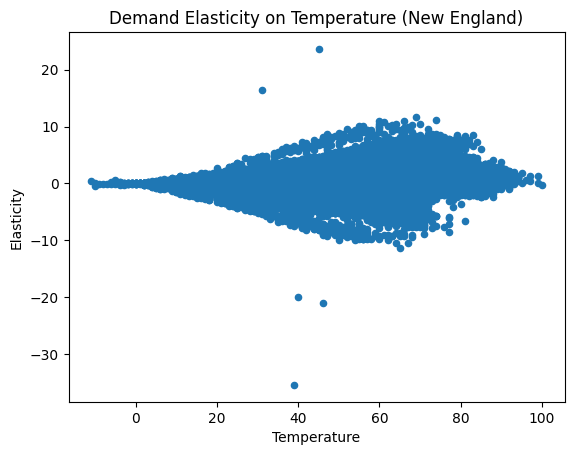

In [15]:
pct_change_dfs[0].plot.scatter('Temperature', 'Elasticity')
plt.title('Demand Elasticity on Temperature (New England)')

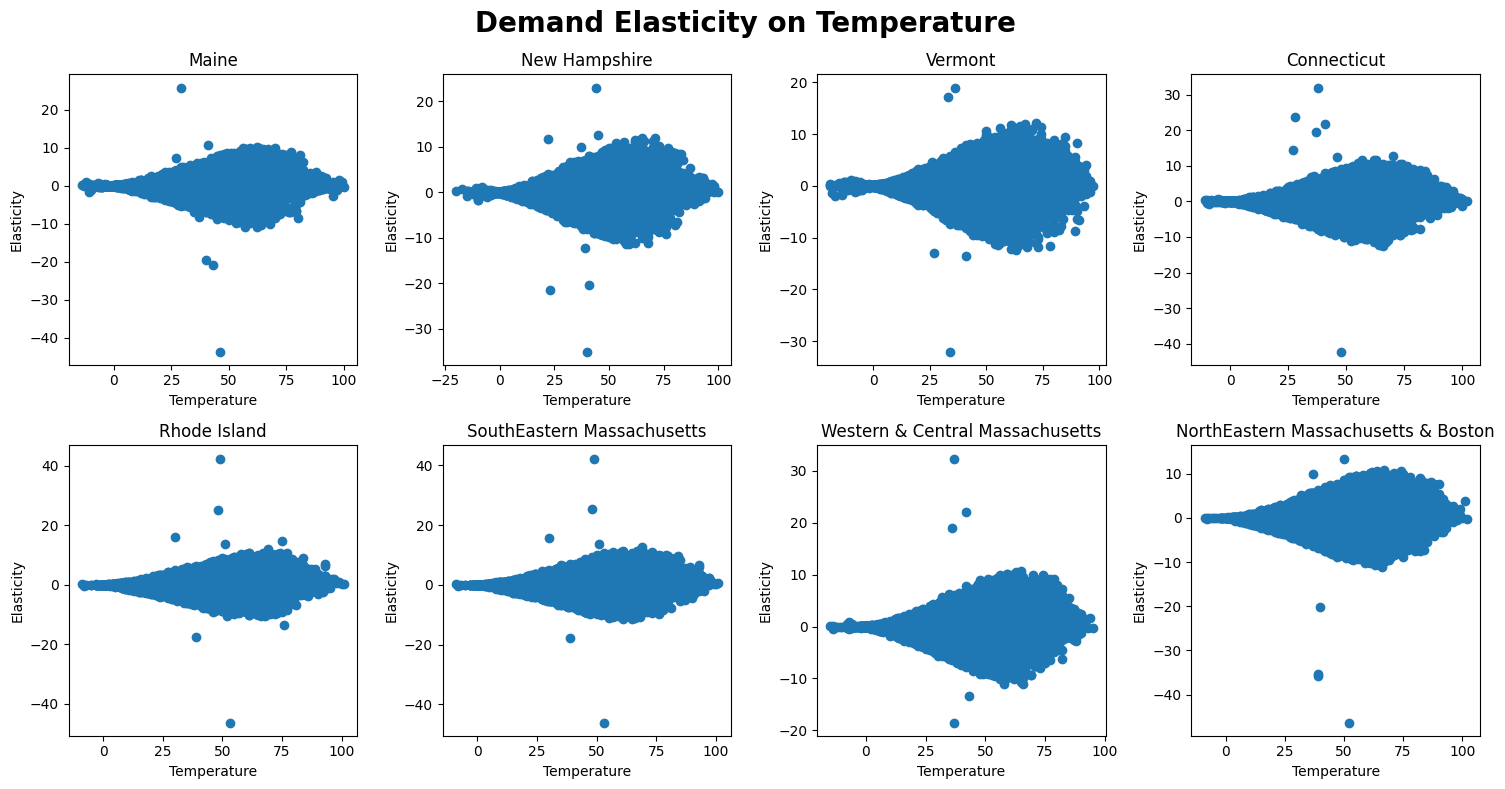

In [16]:
# Assuming `state_dfs` is a list of 8 DataFrames and `state_names` is a list of 8 titles
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Creates a 2x4 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each DataFrame and corresponding title
for i, (df, name) in enumerate(zip(pct_change_dfs[1:], state_names_full[1:])):
    axes[i].scatter(df['Temperature'], df['Elasticity'])
    axes[i].set_title(name)
    axes[i].set_ylabel('Elasticity')
    axes[i].set_xlabel('Temperature')

fig.suptitle('Demand Elasticity on Temperature', fontsize=20, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Running Regression

Regression model:

$$
\log(\text{Demand}) = \beta_0 + \sum_{r} \sum_{t} (\beta_{r,t} \cdot \text{Temperature} \cdot \text{Region}_r \cdot \text{Year}_t) + \delta \cdot \text{Nat Gas Price} + \text{Fixed Effects} + \epsilon
$$

Where:

- $\beta_{r,t}$: Coefficient for temperature in region \( r \) and year \( t \) (what you want to extract and plot).
- Fixed effects account for unobserved differences across regions and years.


In [17]:
big_state_df = pd.concat(state_dfs[1:], ignore_index=False)
big_state_df.rename(columns = {'Natural Gas Price' : "nat_gas_price"}, inplace = True)

big_state_df

,Year,Region,Date,Hour,Demand,Temperature,nat_gas_price
0,2011,Maine,2011-01-01,1,1048.000,31,7.59
1,2011,Maine,2011-01-01,2,1000.000,31,7.59
2,2011,Maine,2011-01-01,3,964.000,32,7.59
3,2011,Maine,2011-01-01,4,954.000,35,7.59
4,2011,Maine,2011-01-01,5,960.000,34,7.59
...,...,...,...,...,...,...,...
61358,2017,NorthEastern Massachusetts & Boston,2017-12-31,20,3716.054,9,5.24
61359,2017,NorthEastern Massachusetts & Boston,2017-12-31,21,3619.467,8,5.24
61360,2017,NorthEastern Massachusetts & Boston,2017-12-31,22,3512.155,7,5.24
61361,2017,NorthEastern Massachusetts & Boston,2017-12-31,23,3387.021,6,5.24


In [18]:
# Ensure categories for interaction, using Maine as the reference
big_state_df['Year'] = big_state_df['Year'].astype(str)
big_state_df['Region'] = pd.Categorical(big_state_df['Region'], 
                                        categories=['Maine', 'Connecticut', 'Vermont', 'New Hampshire', 'Rhode Island', 
                                                    'SouthEastern Massachusetts', 'Western & Central Massachusetts',
                                                    'NorthEastern Massachusetts & Boston'], ordered=False)


# Run regression with interaction terms for region and year with temperature
model = smf.ols(
    formula="Demand ~ Temperature:C(Year):C(Region) + nat_gas_price + C(Region) + C(Year)",
    data=big_state_df
).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.817e+04
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:44:59   Log-Likelihood:            -3.6286e+06
No. Observations:              490904   AIC:                         7.257e+06
Df Residuals:                  490833   BIC:                         7.258e+06
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [22]:
model.params.head()

Intercept                     1022.685251
C(Region)[T.Connecticut]      1842.967258
C(Region)[T.Vermont]          -534.279185
C(Region)[T.New Hampshire]     -25.023129
C(Region)[T.Rhode Island]     -403.417346
dtype: float64

#### Regional Demand Sensitivity

In [20]:
region_avg_betas = pd.DataFrame({'Region' : ['Connecticut', 'Vermont', 'New Hampshire', 'Rhode Island', 
                                                    'SouthEastern Massachusetts', 'Western & Central Massachusetts',
                                                    'NorthEastern Massachusetts & Boston'],
                                 'Beta' : model.params[1:8]})
region_avg_betas.reset_index(drop=True, inplace=True)
region_avg_betas.loc[len(region_avg_betas)] = ['Maine', 0]      #Maine is used as reference

region_avg_betas

,Region,Beta
0,Connecticut,1842.967258
1,Vermont,-534.279185
2,New Hampshire,-25.023129
3,Rhode Island,-403.417346
4,SouthEastern Massachusetts,205.381417
5,Western & Central Massachusetts,700.758283
6,NorthEastern Massachusetts & Boston,1351.379796
7,Maine,0.000000


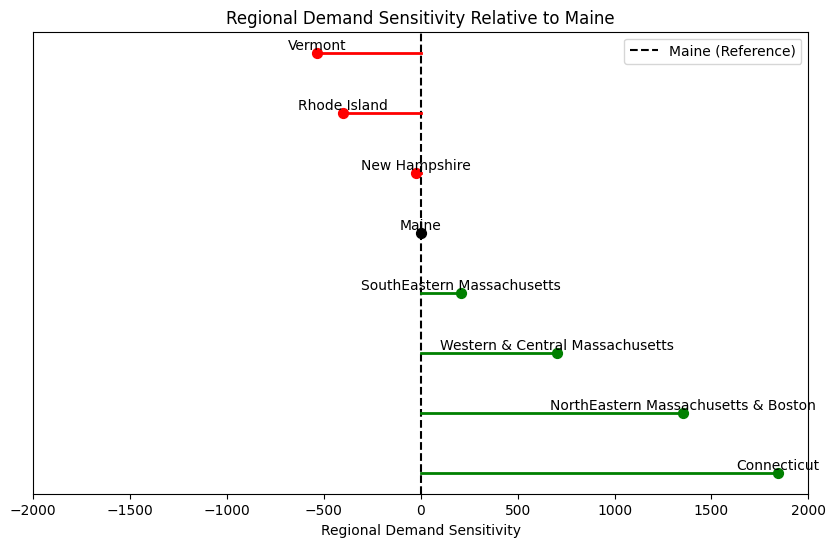

In [23]:
# Sort the DataFrame by Beta values for better visualization
region_avg_betas = region_avg_betas.sort_values(by='Beta', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the vertical line for Maine (coefficient = 0)
plt.axvline(x=0, color='black', linestyle='--', label='Maine (Reference)')

# Add horizontal lines and points for each region
for _, row in region_avg_betas.iterrows():
    region = row['Region']
    beta = row['Beta']
    
    # Horizontal line: green if positive, red if negative
    line_color = 'green' if beta >= 0 else 'red'
    plt.plot([0, beta], [region, region], color=line_color, lw=2)  # Horizontal line from Maine to region
    
    # Dot color: green if positive, red if negative, black for Maine
    if region == 'Maine':
        dot_color = 'black'
    else:
        dot_color = 'green' if beta >= 0 else 'red'

    # Plot the point (region's coefficient) on the x-axis, with smaller size
    plt.scatter(beta, region, color=dot_color, s=50)

    # Label the region above the dot
    plt.text(beta, region, region, ha='center', va='bottom', fontsize=10)

# Remove y-axis label
plt.yticks([])

# Set x-axis ticks from -2000 to 2000 with a step of 500
plt.xticks(range(-2000, 2001, 500))

# Add labels and title
plt.xlabel('Regional Demand Sensitivity')
plt.title('Regional Demand Sensitivity Relative to Maine')

# Add legend
plt.legend()

# Show the plot without the grid
plt.grid(False)

# Show the plot
plt.show()
